In [38]:
%matplotlib notebook
import matplotlib.pyplot as plt
import json
import re
import pandas
import os
import pymongo
from flask_pymongo import PyMongo
from bson.objectid import ObjectId
from flask import Flask, jsonify, json
from flask_pymongo import PyMongo

DBS_NAME = os.getenv("DBS_NAME")
MONGO_URI = os.getenv("MONGODB_URI")

app = Flask(__name__)
app.secret_key = 'The cat is on the roof'

app.config["DBS_NAME"] = "cookbook"
app.config["MONGO_URI"] = "mongodb://localhost:27017/cookbook"

mongo = PyMongo(app)

cuisine_list = [cuisine for cuisine in mongo.db.cuisine.find()]

RECIPES_DATA_PATH = 'recipes.json'

def read_json(file_path):
    results = []
    with open(RECIPES_DATA_PATH) as recipes_file:
        for recipes in recipes_file:
            try:
                recipe = json.loads(recipes)
                results.append(recipe)
            except ValueError:
                pass
#         print(len(results))
        return results


def is_text_in_field(token, text):
    token = token
    text = ''.join(text).lower()
    match = re.search(token, text)
    if match:
        return True
    return False


results = read_json(RECIPES_DATA_PATH)

recipesDataFrame = pandas.DataFrame()
# recipesDataFrame['description'] = [recipe['description'] for recipe in results]
recipesDataFrame['cuisine'] = [recipe['cuisine'] for recipe in results]


for cuisine in cuisine_list:
    cuis = cuisine['cuisine_name']
    recipesDataFrame[cuis] = recipesDataFrame['cuisine'].apply(lambda recipe: is_text_in_field(cuis, recipe))
    print(recipesDataFrame[cuis].value_counts()[True])

    
#     print(recipesDataFrame['Italian'].value_counts()[True])
# print(recipesDataFrame['American'].value_counts()[True])












KeyError: True

<IPython.core.display.Javascript object>


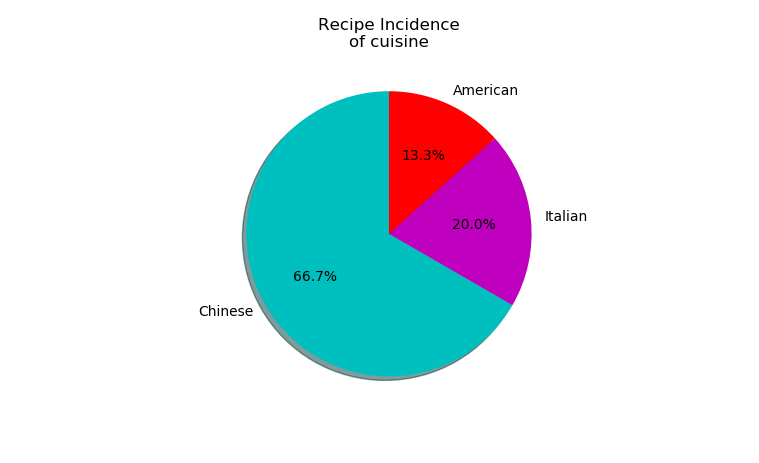

In [19]:
def cuisine_pie():
    slices = recipesDataFrame['Chinese'].value_counts()[True], recipesDataFrame['Italian'].value_counts()[True], recipesDataFrame['American'].value_counts()[True]

    activities = ['Chinese', 'Italian', 'American']
    cols = ['c','m','r']
    
    plt.pie(slices, colors=cols, labels=activities, 
            startangle=90, shadow=True, explode=None, autopct='%1.1f%%')
            
    plt.title('Recipe Incidence\nof cuisine')
    plt.show()
    

cuisine_pie()